# K-NEAREST NEIGHBOURS

## Objective : 

The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('Zoo.csv')

In [3]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:

# Data Preprocessing
# Encode categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
# Set plotting parameters
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 500
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
# Check for missing values
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [7]:

# Impute missing values (though not needed in this case as there are no missing values)
si = SimpleImputer(strategy='mean')
df = pd.DataFrame(si.fit_transform(df), columns=df.columns)

In [8]:

# Data Description
print(df.describe())

       animal name        hair    feathers        eggs  ...        tail    domestic     catsize        type
count   101.000000  101.000000  101.000000  101.000000  ...  101.000000  101.000000  101.000000  101.000000
mean     49.257426    0.425743    0.198020    0.584158  ...    0.742574    0.128713    0.435644    1.831683
std      28.968829    0.496921    0.400495    0.495325  ...    0.439397    0.336552    0.498314    2.102709
min       0.000000    0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000    0.000000
25%      25.000000    0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000    0.000000
50%      49.000000    0.000000    0.000000    1.000000  ...    1.000000    0.000000    0.000000    1.000000
75%      74.000000    1.000000    0.000000    1.000000  ...    1.000000    0.000000    1.000000    3.000000
max      99.000000    1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000    6.000000

[8 rows x 18 columns]


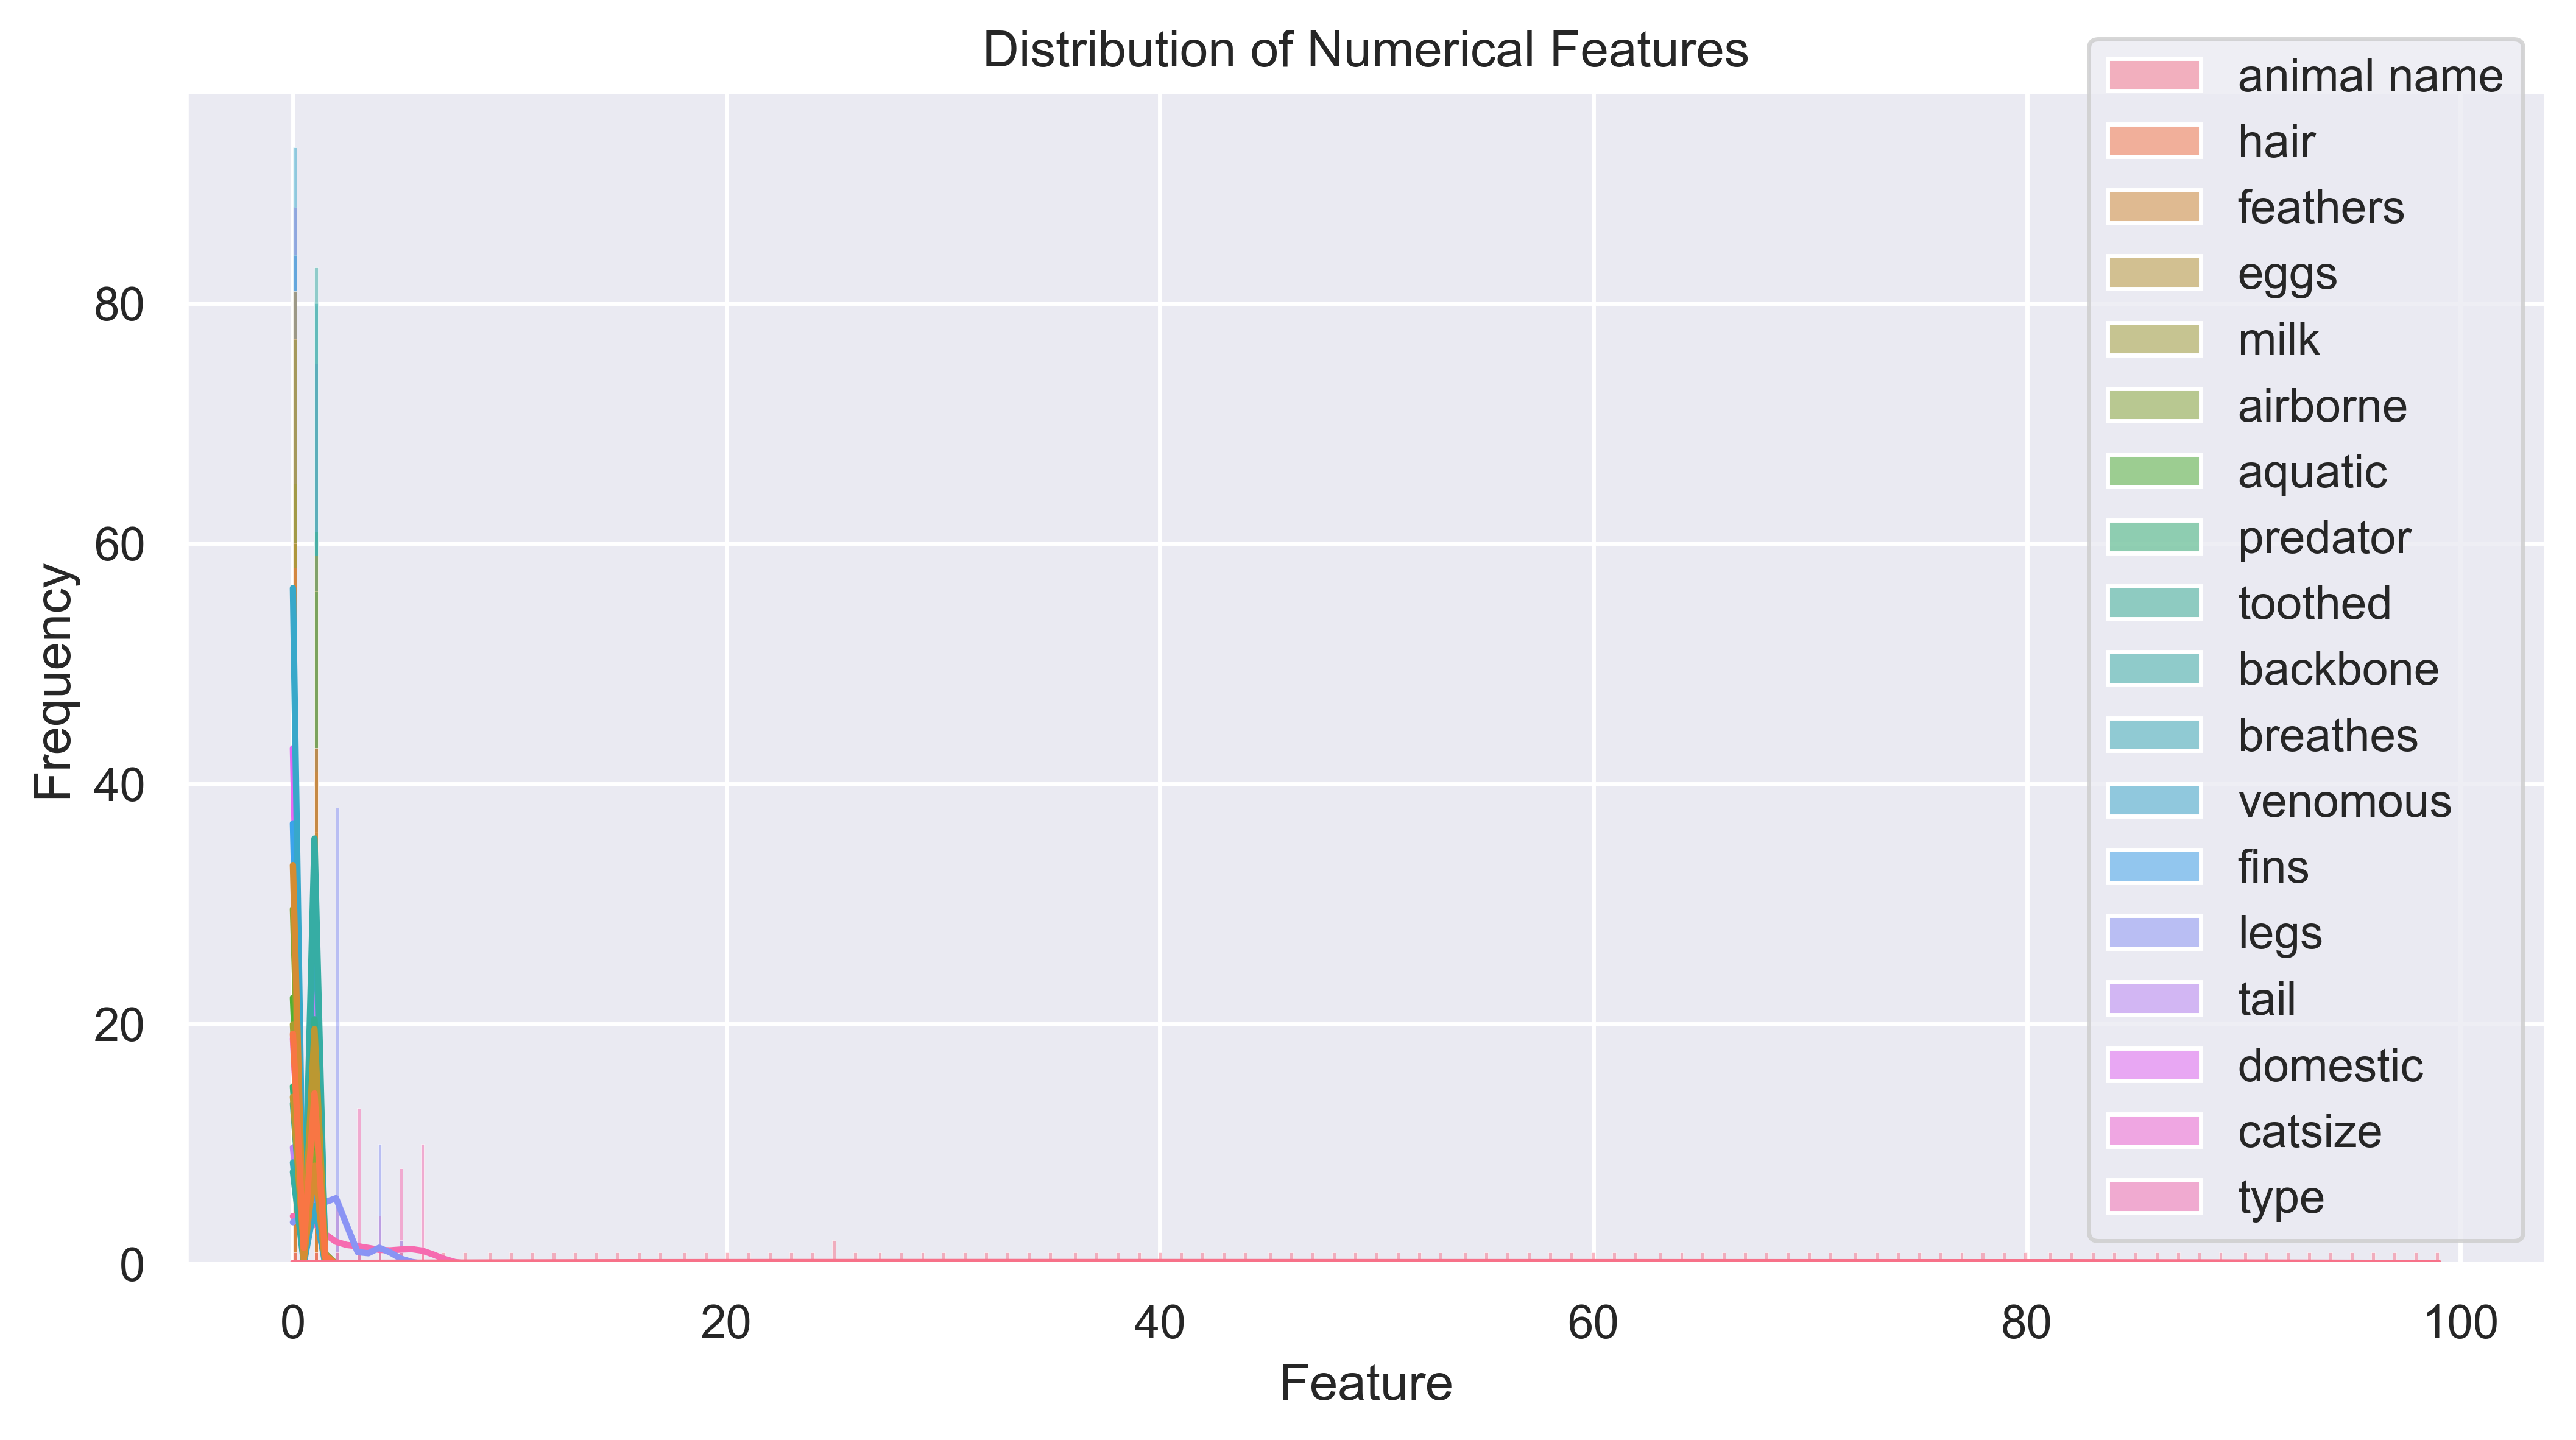

In [9]:

# Visualization
sns.histplot(data=df, kde=True)
plt.title('Distribution of Numerical Features')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.show()

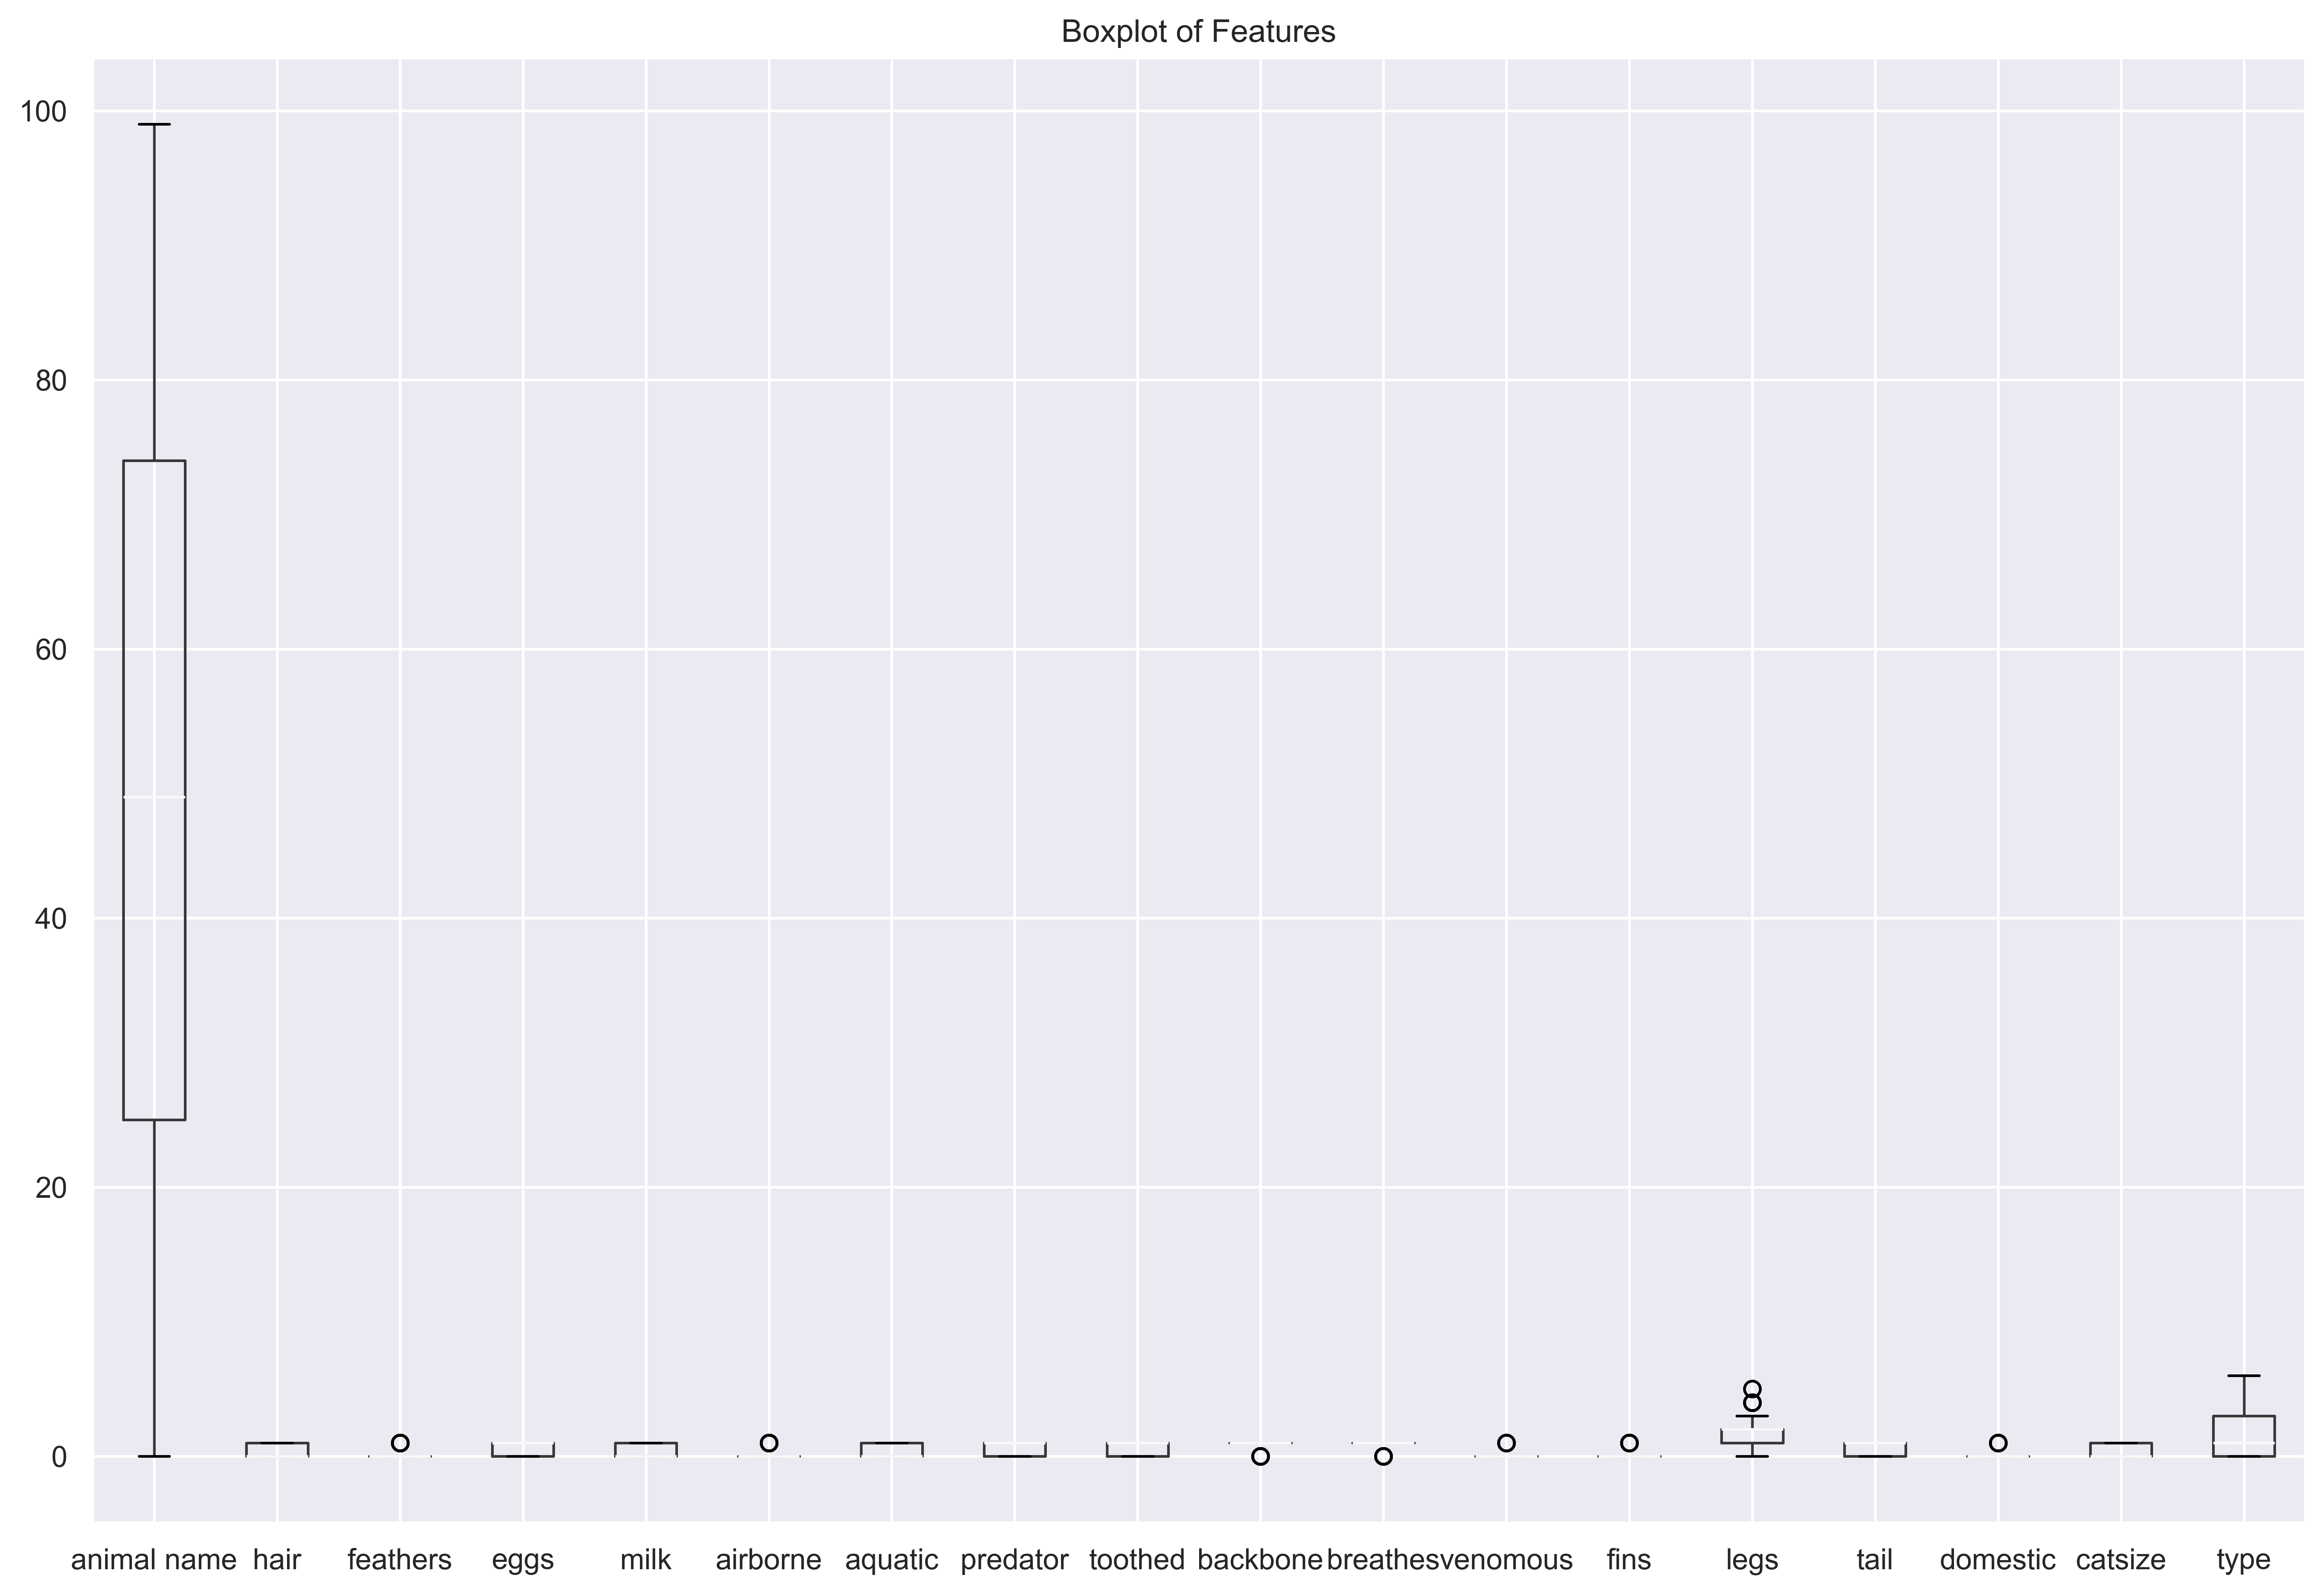

In [10]:
df.boxplot(figsize=(15, 10))
plt.title('Boxplot of Features')
plt.show()

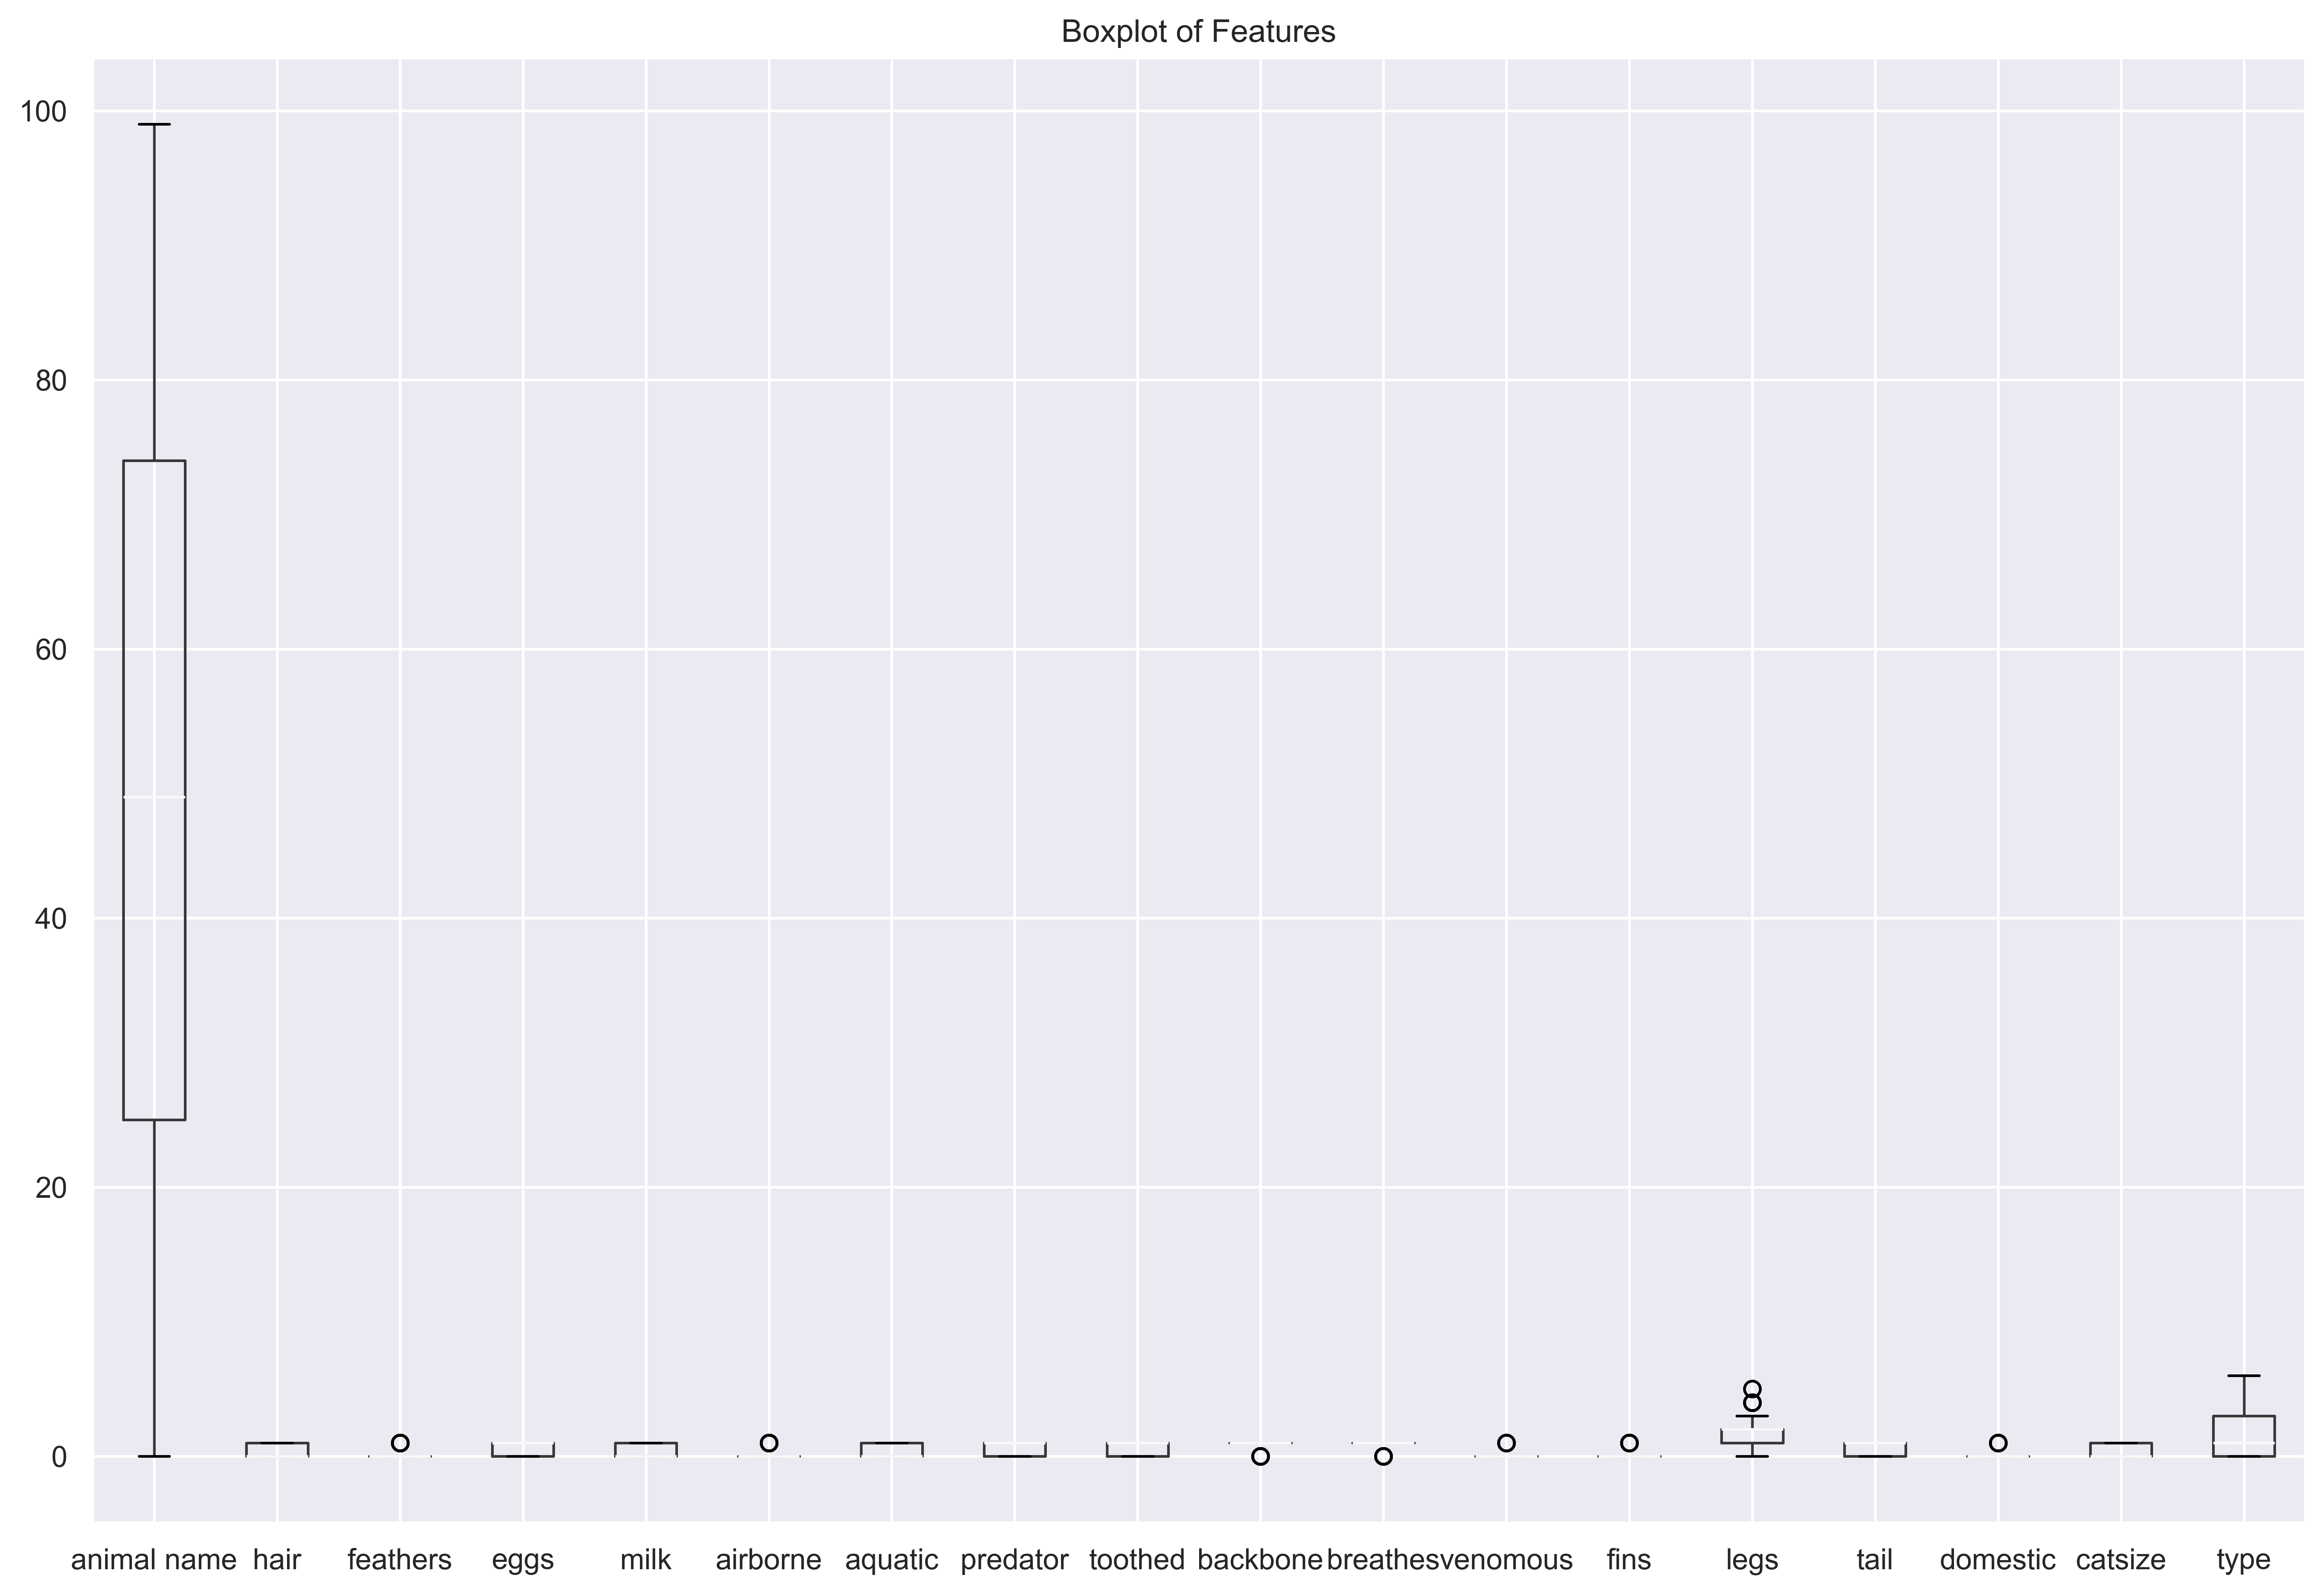

In [11]:
df.boxplot(figsize=(15, 10))
plt.title('Boxplot of Features')
plt.show()

In [13]:

# Prepare data for training
x = df.iloc[:, :-1]  # Features
y = df['type']       # Target

In [14]:

# Feature Scaling
sc = StandardScaler()
x = sc.fit_transform(x)

In [15]:


# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [16]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Predictions and Evaluation
y_pred = knn.predict(x_test)
print("Training accuracy:", knn.score(x_train, y_train))
print("Testing accuracy:", knn.score(x_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training accuracy: 0.975
Testing accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         3
         6.0       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


# Interview Questions:

1)What are the key hyperparameters in KNN?

- **n_neighbors**: Number of neighbors to consider.
- **weights**: Weighting of neighbors (uniform or distance).
- **algorithm**: Search algorithm (auto, ball_tree, kd_tree, brute).
- **p**: Power parameter for distance metrics (1 for Manhattan, 2 for Euclidean).
- **leaf_size**: Affects speed and memory for ball_tree and kd_tree.

2)What distance metrics can be used in KNN?



- **Euclidean**: Straight-line distance.
- **Manhattan**: Grid-like distance.
- **Minkowski**: Generalized distance (Euclidean if p=2, Manhattan if p=1).
- **Chebyshev**: Greatest coordinate difference.
- **Hamming**: Categorical data distance.
- **Cosine Similarity** : Measures angle between vectors.